Cette entreprise utilise un ERP non adapté à ses besoins, ce qui rend l’analyse de ses ventes complexe et laborieuse.

La mission en 3 étapes :

- Lier deux exports : un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock, et un export d’une table de l’outil de CMS   contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes…).
- Présenter le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.
- Analyse sur la variable des prix des produits afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.

# Chargement des librairies et fichiers excel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import *
import warnings
warnings.simplefilter("ignore")

In [2]:
web = pd.read_excel('web.xlsx')

In [3]:
erp = pd.read_excel('erp.xlsx')

In [4]:
liaison = pd.read_excel('liaison.xlsx')

# Nettoyage des données

In [5]:
# Changement du nom de la colonne du df liaison pour la correspondance avec le df web

liaison.rename(columns = {'id_web':'sku'}, inplace = True)

SHAPE:
(1513, 28)

----------------------
UNIQUE:
sku                       714
virtual                     1
downloadable                1
rating_count                1
average_rating              1
total_sales                41
tax_status                  1
tax_class                   0
post_author                 2
post_date                 716
post_date_gmt             716
post_content                0
post_title                713
post_excerpt              679
post_status                 1
comment_status              1
ping_status                 1
post_password               0
post_name                 716
post_modified             589
post_modified_gmt         589
post_content_filtered       0
post_parent                 1
guid                     1430
menu_order                  1
post_type                   2
post_mime_type              1
comment_count               1
dtype: int64

----------------------
COUNT:
sku                      1428
virtual                  1513
downlo

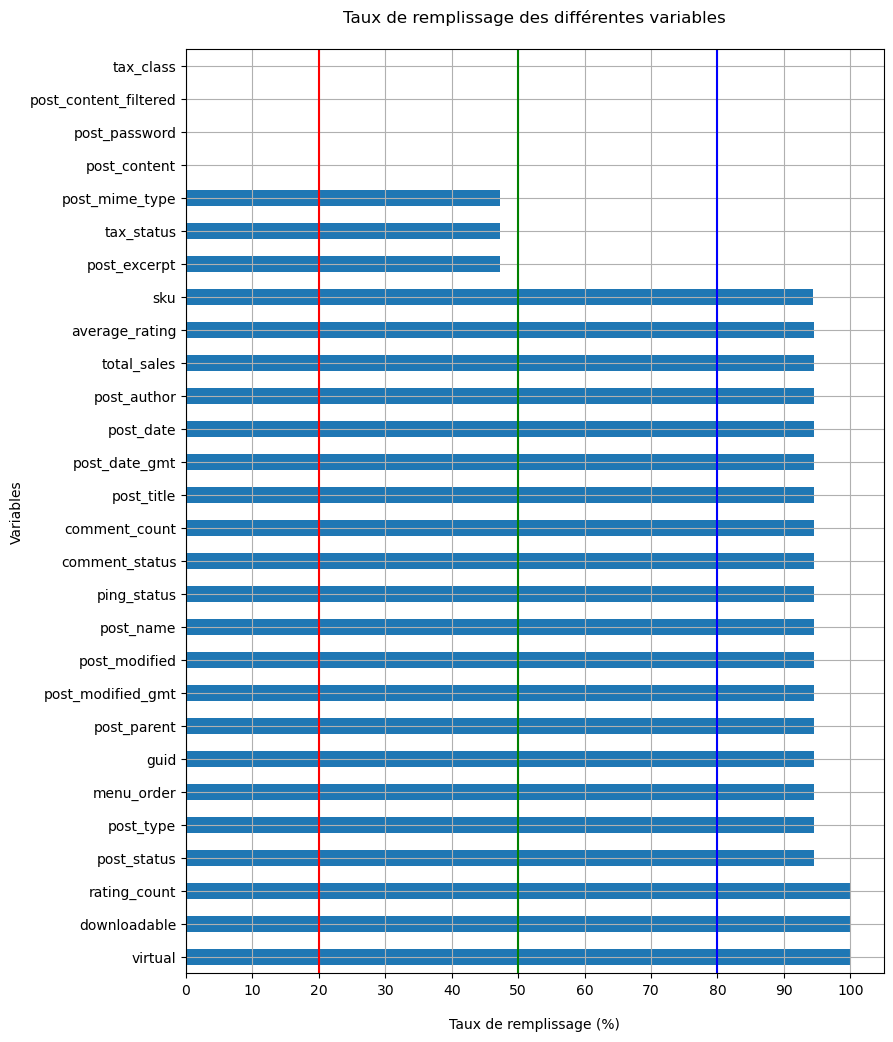

In [6]:
# Fonction issue de ma librairie personnelle d'aperçu des valeurs ainsi qu'un graphique de représentation des valeurs manquantes

verif(web)

In [8]:
# Suppression des doublons sur le df web

web = web.drop_duplicates()

In [9]:
# Vérification de la suppression

web.shape

(1431, 28)

In [10]:
# Attribution de la valeur 0 aux valeurs manquantes

web.fillna(0, inplace=True)

In [11]:
# Vérification de l'application du fillna

#web.isnull().sum()

In [12]:
# Vérification types

#web.dtypes

SHAPE:
(825, 5)

----------------------
UNIQUE:
product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64

----------------------
COUNT:
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
dtype: int64

----------------------
NULL:
product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

----------------------
Taux de valeurs manquantes (%):
product_id        0.0
onsale_web        0.0
price             0.0
stock_quantity    0.0
stock_status      0.0
dtype: float64

----------------------
DUPLICATED:
0

----------------------


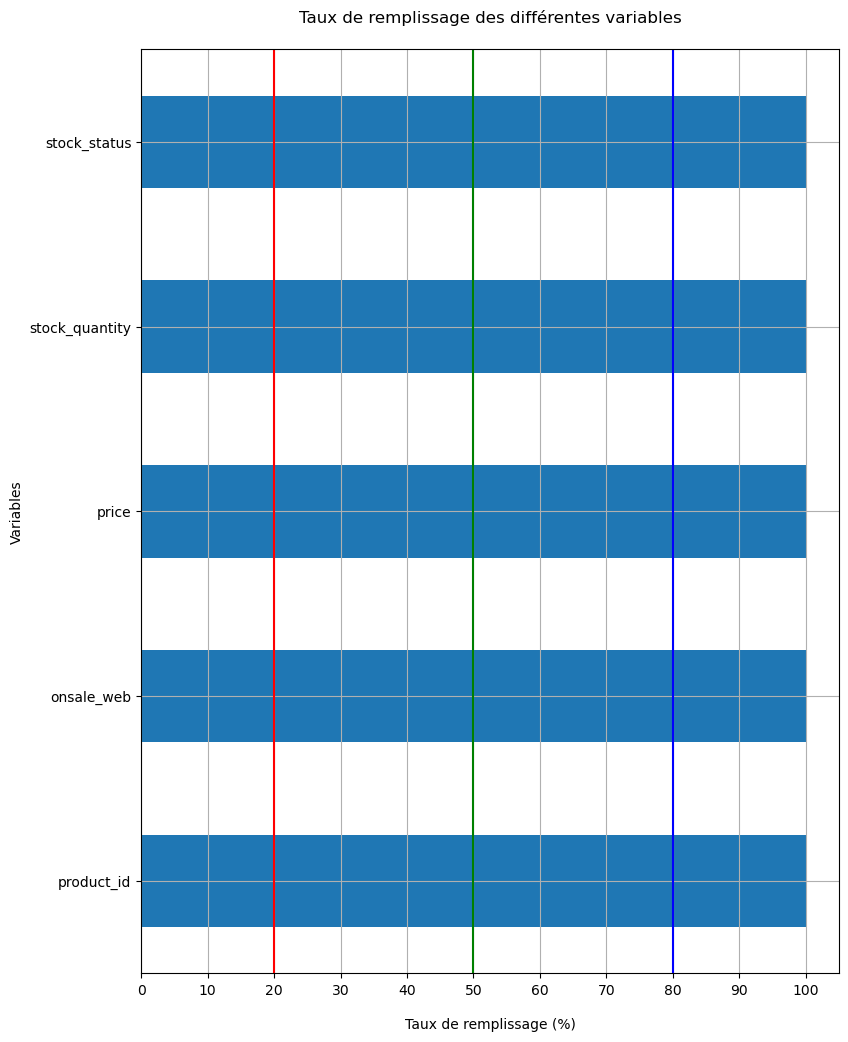

In [13]:
# Visualisation du df erp

verif(erp)

In [15]:
# Vérif types

erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

SHAPE:
(825, 2)

----------------------
UNIQUE:
product_id    825
sku           734
dtype: int64

----------------------
COUNT:
product_id    825
sku           734
dtype: int64

----------------------
NULL:
product_id     0
sku           91
dtype: int64

----------------------
Taux de valeurs manquantes (%):
product_id     0.00
sku           11.03
dtype: float64

----------------------
DUPLICATED:
0

----------------------


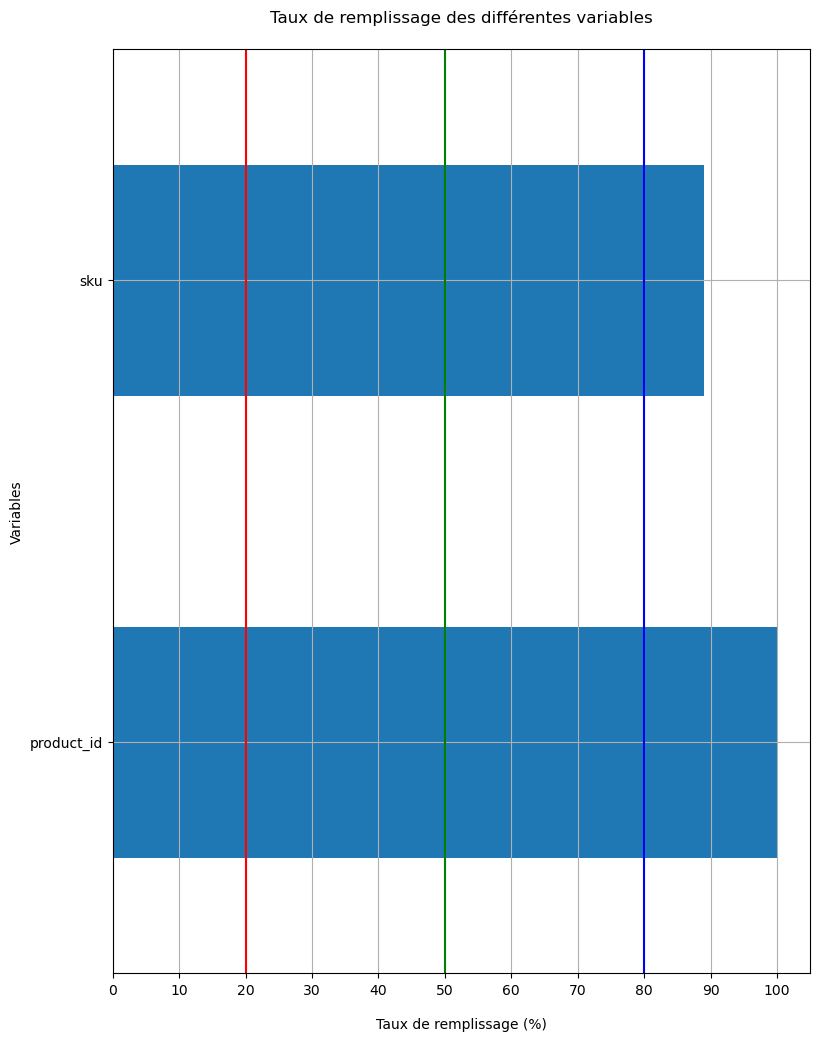

In [16]:
# Visualisation du df liaison 

verif(liaison)

In [18]:
# Controle du nombre d'éléments null
# info sur le mail du projet : "La liste des product_id est exhaustive, mais pour les
# références côté Web,j’en suis moins sûre... 
# J’ai peiné à rapprocher certaines références."
# rappel : sku = id_web

liaison.isnull().sum()

product_id     0
sku           91
dtype: int64

In [19]:
# Verif du type

liaison.dtypes

product_id     int64
sku           object
dtype: object

# Liaison et nettoyage des DataFrames

In [20]:
# Fusion entre les df erp et liaison 

erp_liaison = pd.merge(erp, liaison, on='product_id' ) 
erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [21]:
# Fusion entre les df erp, liaison et web

erp_web = pd.merge(web, erp_liaison, on='sku',how='outer') 
erp_web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,0.0,0.0,0.0,0.0,10.0,taxable,0.0,1.0,2018-06-01 13:53:46,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0,4954.0,1.0,25.0,0.0,instock
1,bon-cadeau-25-euros,0.0,0.0,0.0,0.0,10.0,0,0.0,1.0,2018-06-01 13:53:46,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,4954.0,1.0,25.0,0.0,instock
2,15298,0.0,0.0,0.0,0.0,6.0,taxable,0.0,2.0,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0,3847.0,1.0,24.2,0.0,outofstock
3,15298,0.0,0.0,0.0,0.0,6.0,0,0.0,2.0,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,3847.0,1.0,24.2,0.0,outofstock
4,15296,0.0,0.0,0.0,0.0,0.0,taxable,0.0,2.0,2018-02-08 13:49:41,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0,3849.0,1.0,34.3,0.0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,15609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5954.0,0.0,18.8,0.0,outofstock
1538,14377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5955.0,0.0,27.3,0.0,outofstock
1539,13577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5957.0,0.0,39.0,0.0,outofstock
1540,15529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6100.0,0.0,12.9,0.0,outofstock


In [22]:
# Suppression des NaN

erp_web.dropna(inplace=True)

In [23]:
# Verification des doublons 

erp_web.duplicated().sum()

0

In [24]:
# Aperçu du df
# Remarque : présence de doublons mais avec une variable differente 
# ( voir tax_status ou post_type)

erp_web.head(5)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,0.0,0.0,0.0,0.0,10.0,taxable,0.0,1.0,2018-06-01 13:53:46,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0,4954.0,1.0,25.0,0.0,instock
1,bon-cadeau-25-euros,0.0,0.0,0.0,0.0,10.0,0,0.0,1.0,2018-06-01 13:53:46,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,4954.0,1.0,25.0,0.0,instock
2,15298,0.0,0.0,0.0,0.0,6.0,taxable,0.0,2.0,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0,3847.0,1.0,24.2,0.0,outofstock
3,15298,0.0,0.0,0.0,0.0,6.0,0,0.0,2.0,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,3847.0,1.0,24.2,0.0,outofstock
4,15296,0.0,0.0,0.0,0.0,0.0,taxable,0.0,2.0,2018-02-08 13:49:41,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0,3849.0,1.0,34.3,0.0,outofstock


In [25]:
# Suppression des lignes inutiles faisant 'doublons' 

erp_web = erp_web.loc[erp_web["post_type"]== "product"]

In [26]:
# Verification de la modification du df

erp_web.shape

(714, 33)

# Détermination du Chiffre d'Affaire par produit ainsi que le montant total

In [27]:
# Ajout d'un colonne au df avec le CA par produit 

erp_web['ca_product'] = erp_web['total_sales'] * erp_web['price']

In [28]:
# représentation de la réponse CA par produit

l = ['product_id', 'ca_product', 'price', 'total_sales']

erp_web_list = erp_web[l].sort_values(by = ['ca_product'], ascending = False)
erp_web_list.reset_index(drop=True, inplace=True)
erp_web_list

,product_id,ca_product,price,total_sales
0,4334.0,4704.0,49.0,96.0
1,4144.0,4263.0,49.0,87.0
2,4402.0,2288.0,176.0,13.0
3,4142.0,1590.0,53.0,30.0
4,4141.0,1560.0,39.0,40.0
...,...,...,...,...
709,4924.0,0.0,12.8,0.0
710,4115.0,0.0,100.0,0.0
711,4130.0,0.0,23.0,0.0
712,4132.0,0.0,88.4,0.0


In [29]:
# CA vente des produits en ligne

print(' CA vente', erp_web['ca_product'].sum())

 CA vente 70568.6


# Détermination et représentation des outliers

In [30]:
# détermination des outliers grâce au Z-score (z = (x-μ)/σ)
# def Z-score (https://datascience.eu/fr/mathematiques-et-statistiques/quest-ce-quun-z-score/)

threshold = 2 # seuil

mean = np.mean(erp_web.price) # moyenne
std = np.std(erp_web.price) # écart-type empirique

# vérification si le z-score de chaque prix est au-dessus du seuil et ne garder que les résultats positifs

z_score_outlier = [i for i in erp_web.price if (i-mean)/std > threshold]

# liste des outliers Z-score

print('Liste des outliers Z-score: ', z_score_outlier)

# nombre d'outliers avec le Z-score

print("Total d'outliers avec le Z-score: ",len(z_score_outlier))

# détermination du seuil de prix au-dessus duquel une données est un outliers avec le z-score

# (x - mean) / std = 2
# x - mean = 2 * std
# x = 2 * std + mean

seuil_outliers_z = 2 * std + mean
print('Prix seuil : ',round((seuil_outliers_z),2))

# affichage complet des outliers z-score

outliers_z = erp_web.loc[erp_web['price'] > seuil_outliers_z]

outliers_list = outliers_z[l].sort_values(by = ['price'], ascending = False)
outliers_list.reset_index(drop=True, inplace=True)
outliers_list.head(15)


Liste des outliers Z-score:  [100.0, 88.4, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]
Total d'outliers avec le Z-score:  30
Prix seuil :  88.08


,product_id,ca_product,price,total_sales
0,4352.0,1125.0,225.0,5.0
1,5001.0,0.0,217.5,0.0
2,5892.0,573.9,191.3,3.0
3,4402.0,2288.0,176.0,13.0
4,5767.0,0.0,175.0,0.0
5,4406.0,0.0,157.0,0.0
6,4904.0,685.0,137.0,5.0
7,6126.0,270.0,135.0,2.0
8,4355.0,1391.5,126.5,11.0
9,5612.0,0.0,124.8,0.0


In [31]:
# Valeur de l'écart-type methode 1 

print( 'Ecart-type avec la methode standard deviation (std) : ', round((std),2))

Ecart-type avec la methode standard deviation (std) :  27.79


In [32]:
# Valeur de l'écart-type methode 2

q75, q25 = np.percentile(erp_web['price'], [75 ,25])
iqr = q75 - q25

print (' Ecart-type avec la methode percentile : ', round((iqr),2))

 Ecart-type avec la methode percentile :  28.08


In [33]:
max_quartile = q75 + 1.5 * iqr 

print('Prix seuil avec calcul percentile : ', round((max_quartile),2))

data_outliers_m2 = erp_web[erp_web.price > max_quartile]
data_outliers_m2

print("Total d'outliers : ",len(data_outliers_m2))

Prix seuil avec calcul percentile :  84.29
Total d'outliers :  32


## Représentation graphique des outliers

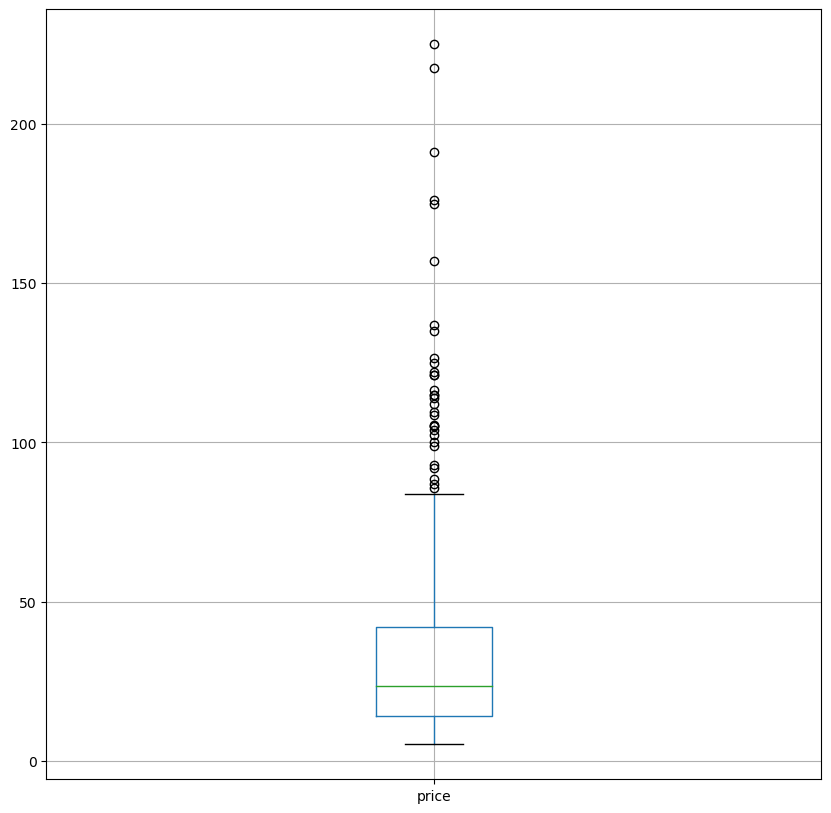

In [34]:
plt.figure(figsize=(10,10))
boxplot = erp_web.boxplot(column=['price'])